In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

In [47]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 1 - Heart Failure Prediction\Heart Failure Prediction.csv"
df = pd.read_csv(path)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [48]:
df.shape

(299, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [50]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

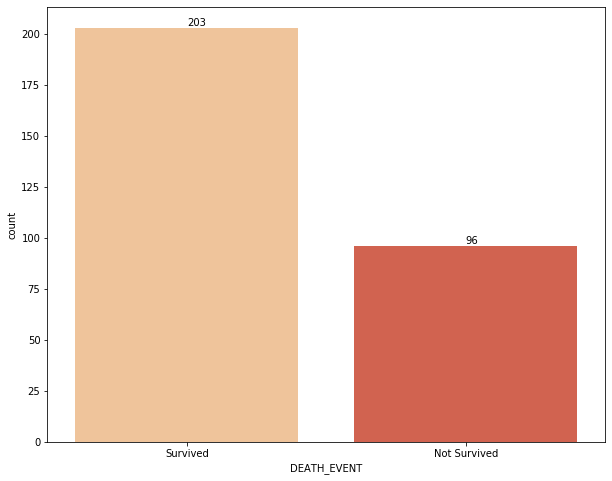

In [51]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['DEATH_EVENT'], palette='OrRd')
ax.set_xticklabels(['Survived','Not Survived'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [52]:
sources_pie = go.Pie( values=df.DEATH_EVENT.value_counts())

layout = go.Layout(height = 600,
                   width = 800,
                   autosize = False,
                   title = 'Death Event')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [53]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.histogram(df, x="age")
fig.show()

Most of the patients are from 50-70 age group

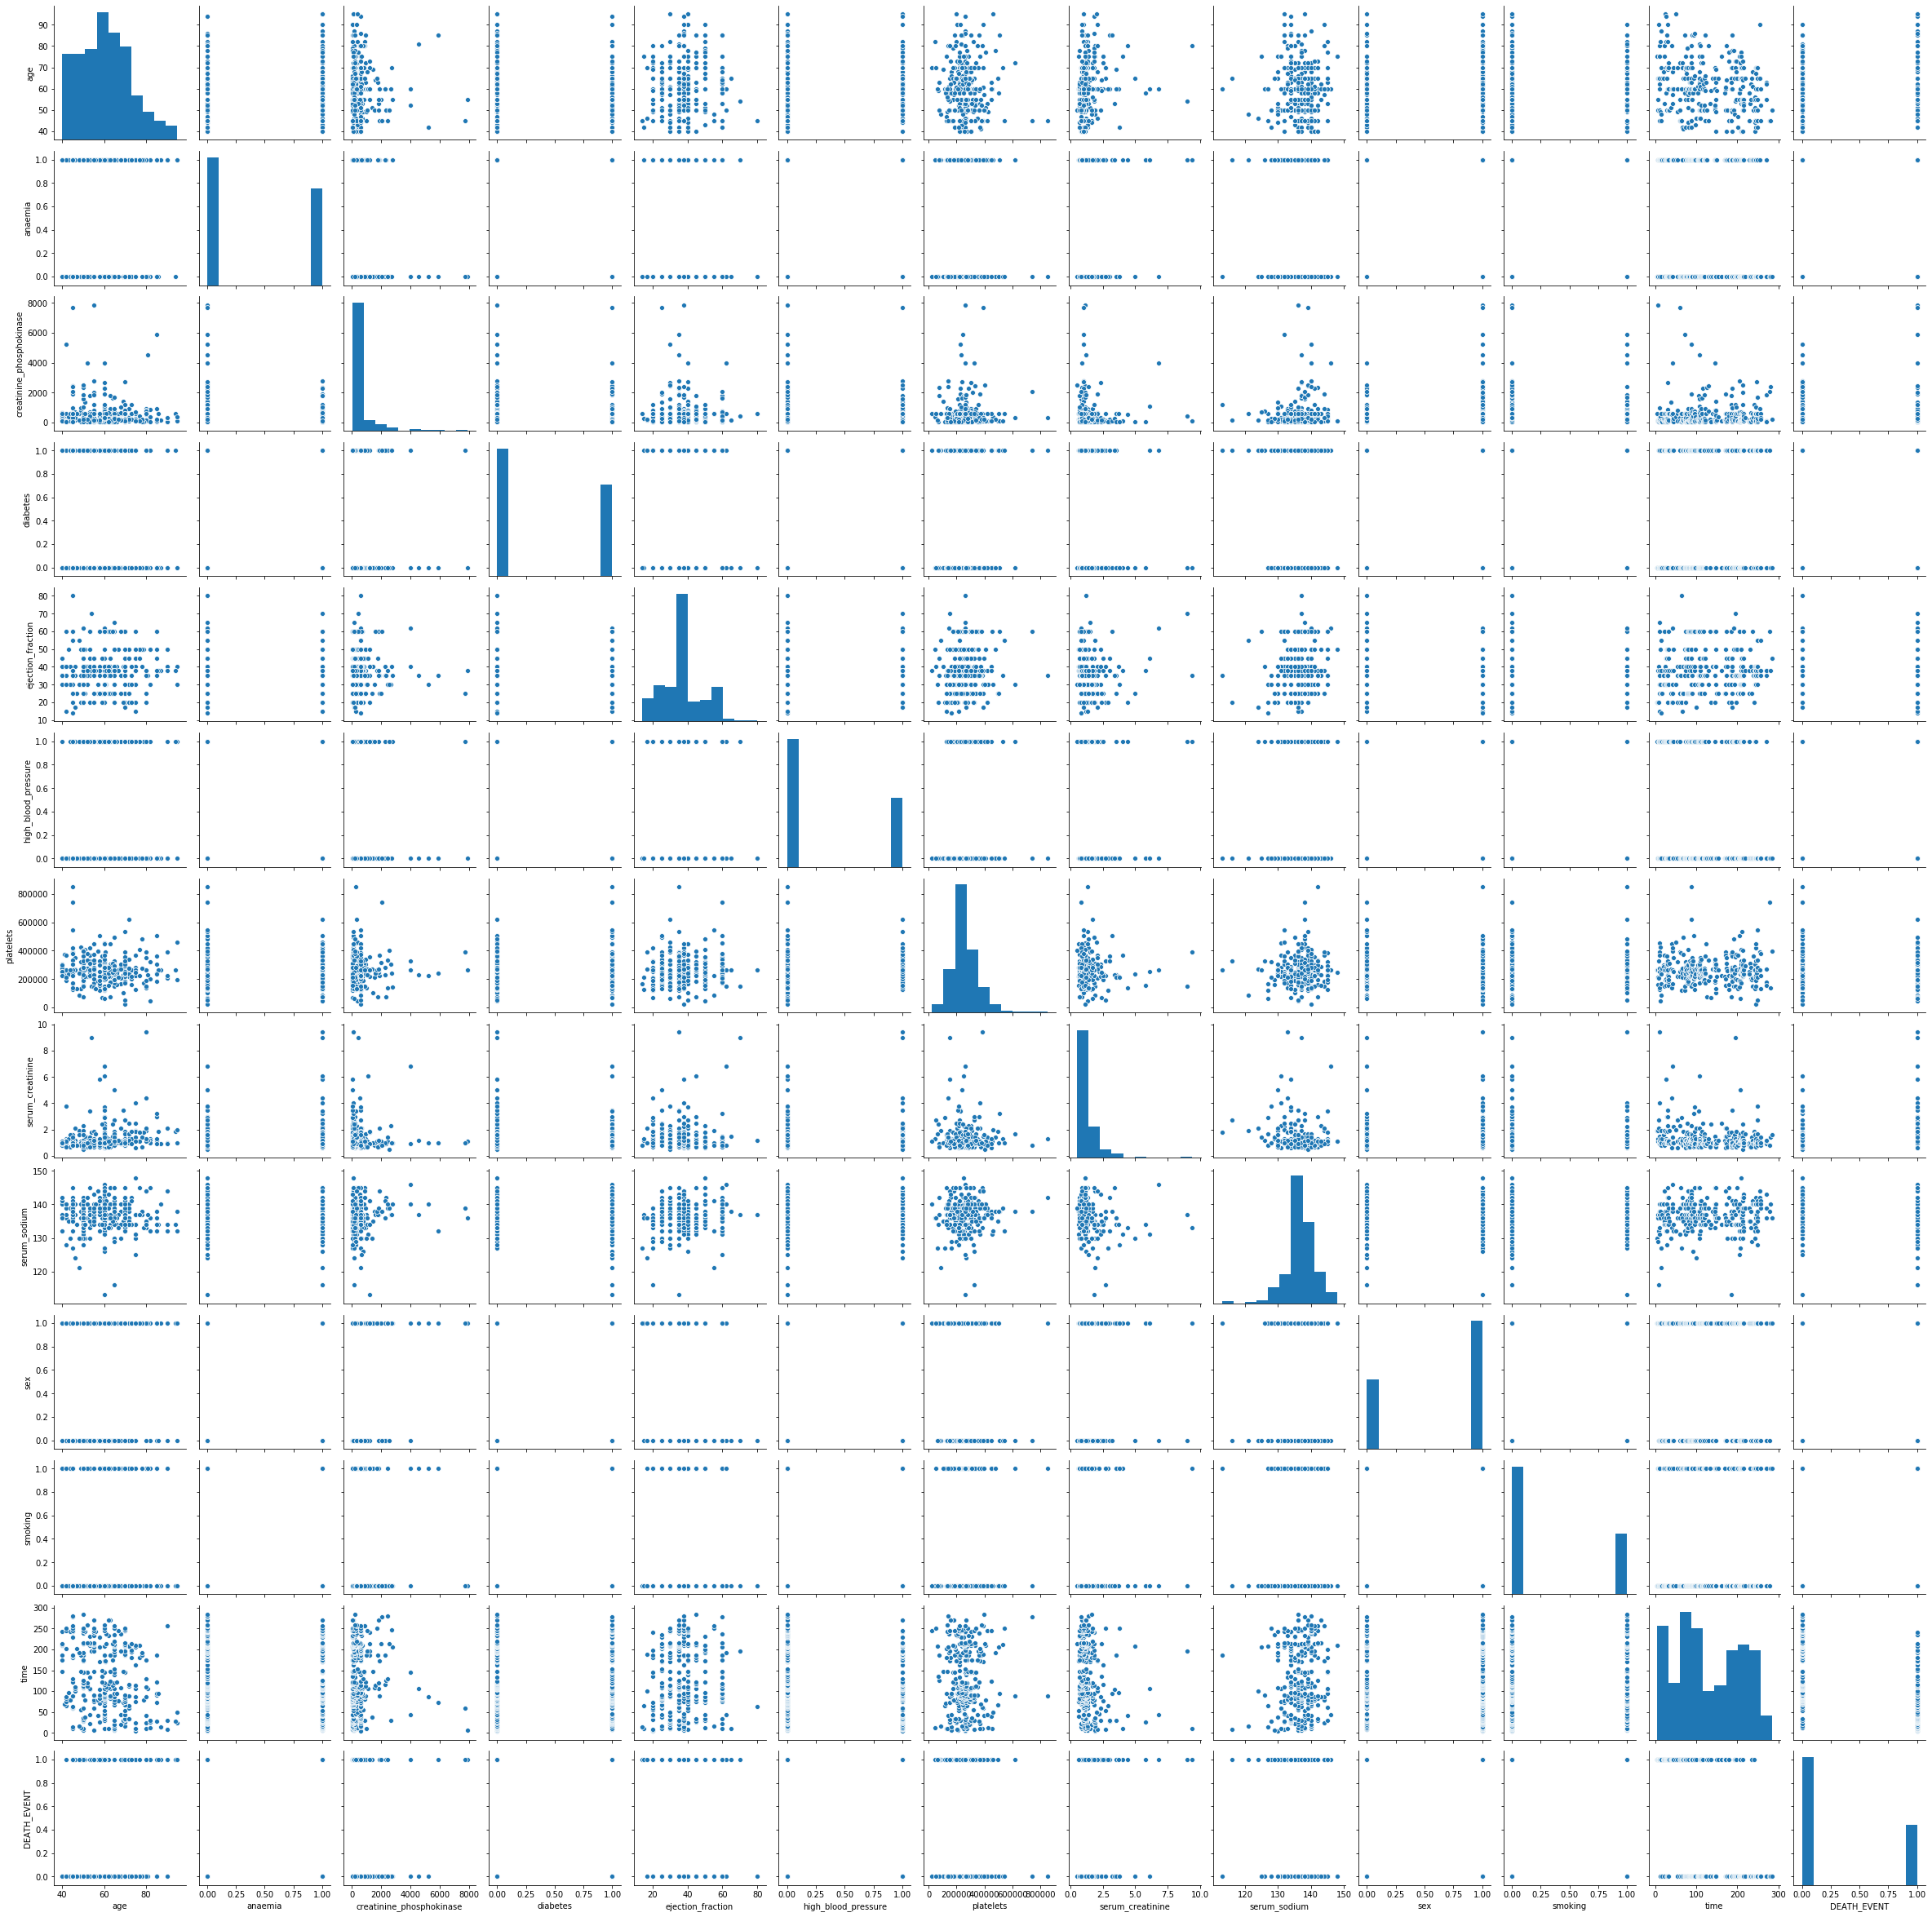

In [54]:
sns.pairplot(df)

Splitting dataframe to data and target

In [55]:
x = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [56]:
x.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [57]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [58]:
import math

In [59]:
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [60]:
calc_entropy(df['time'])

6.906252849111906

In [61]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [62]:
calc_information_gain(df, 'time', 'DEATH_EVENT')

0.9055415027672631

In [63]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 1 - Heart Failure Prediction\Training Set.csv"
dfTrain = pd.read_csv(path)
dfTrain.head()
dfTrain.shape

(202, 13)

In [64]:
x_train = dfTrain[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_train = dfTrain['DEATH_EVENT']

In [65]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 1 - Heart Failure Prediction\Testing Set.csv"
dfTest = pd.read_csv(path)
dfTest.head()
dfTest.shape

(97, 13)

In [66]:
x_test = dfTest[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_test = dfTest['DEATH_EVENT']

In [67]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((97, 12), (97,), (202, 12), (202,))

 Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer

1.0


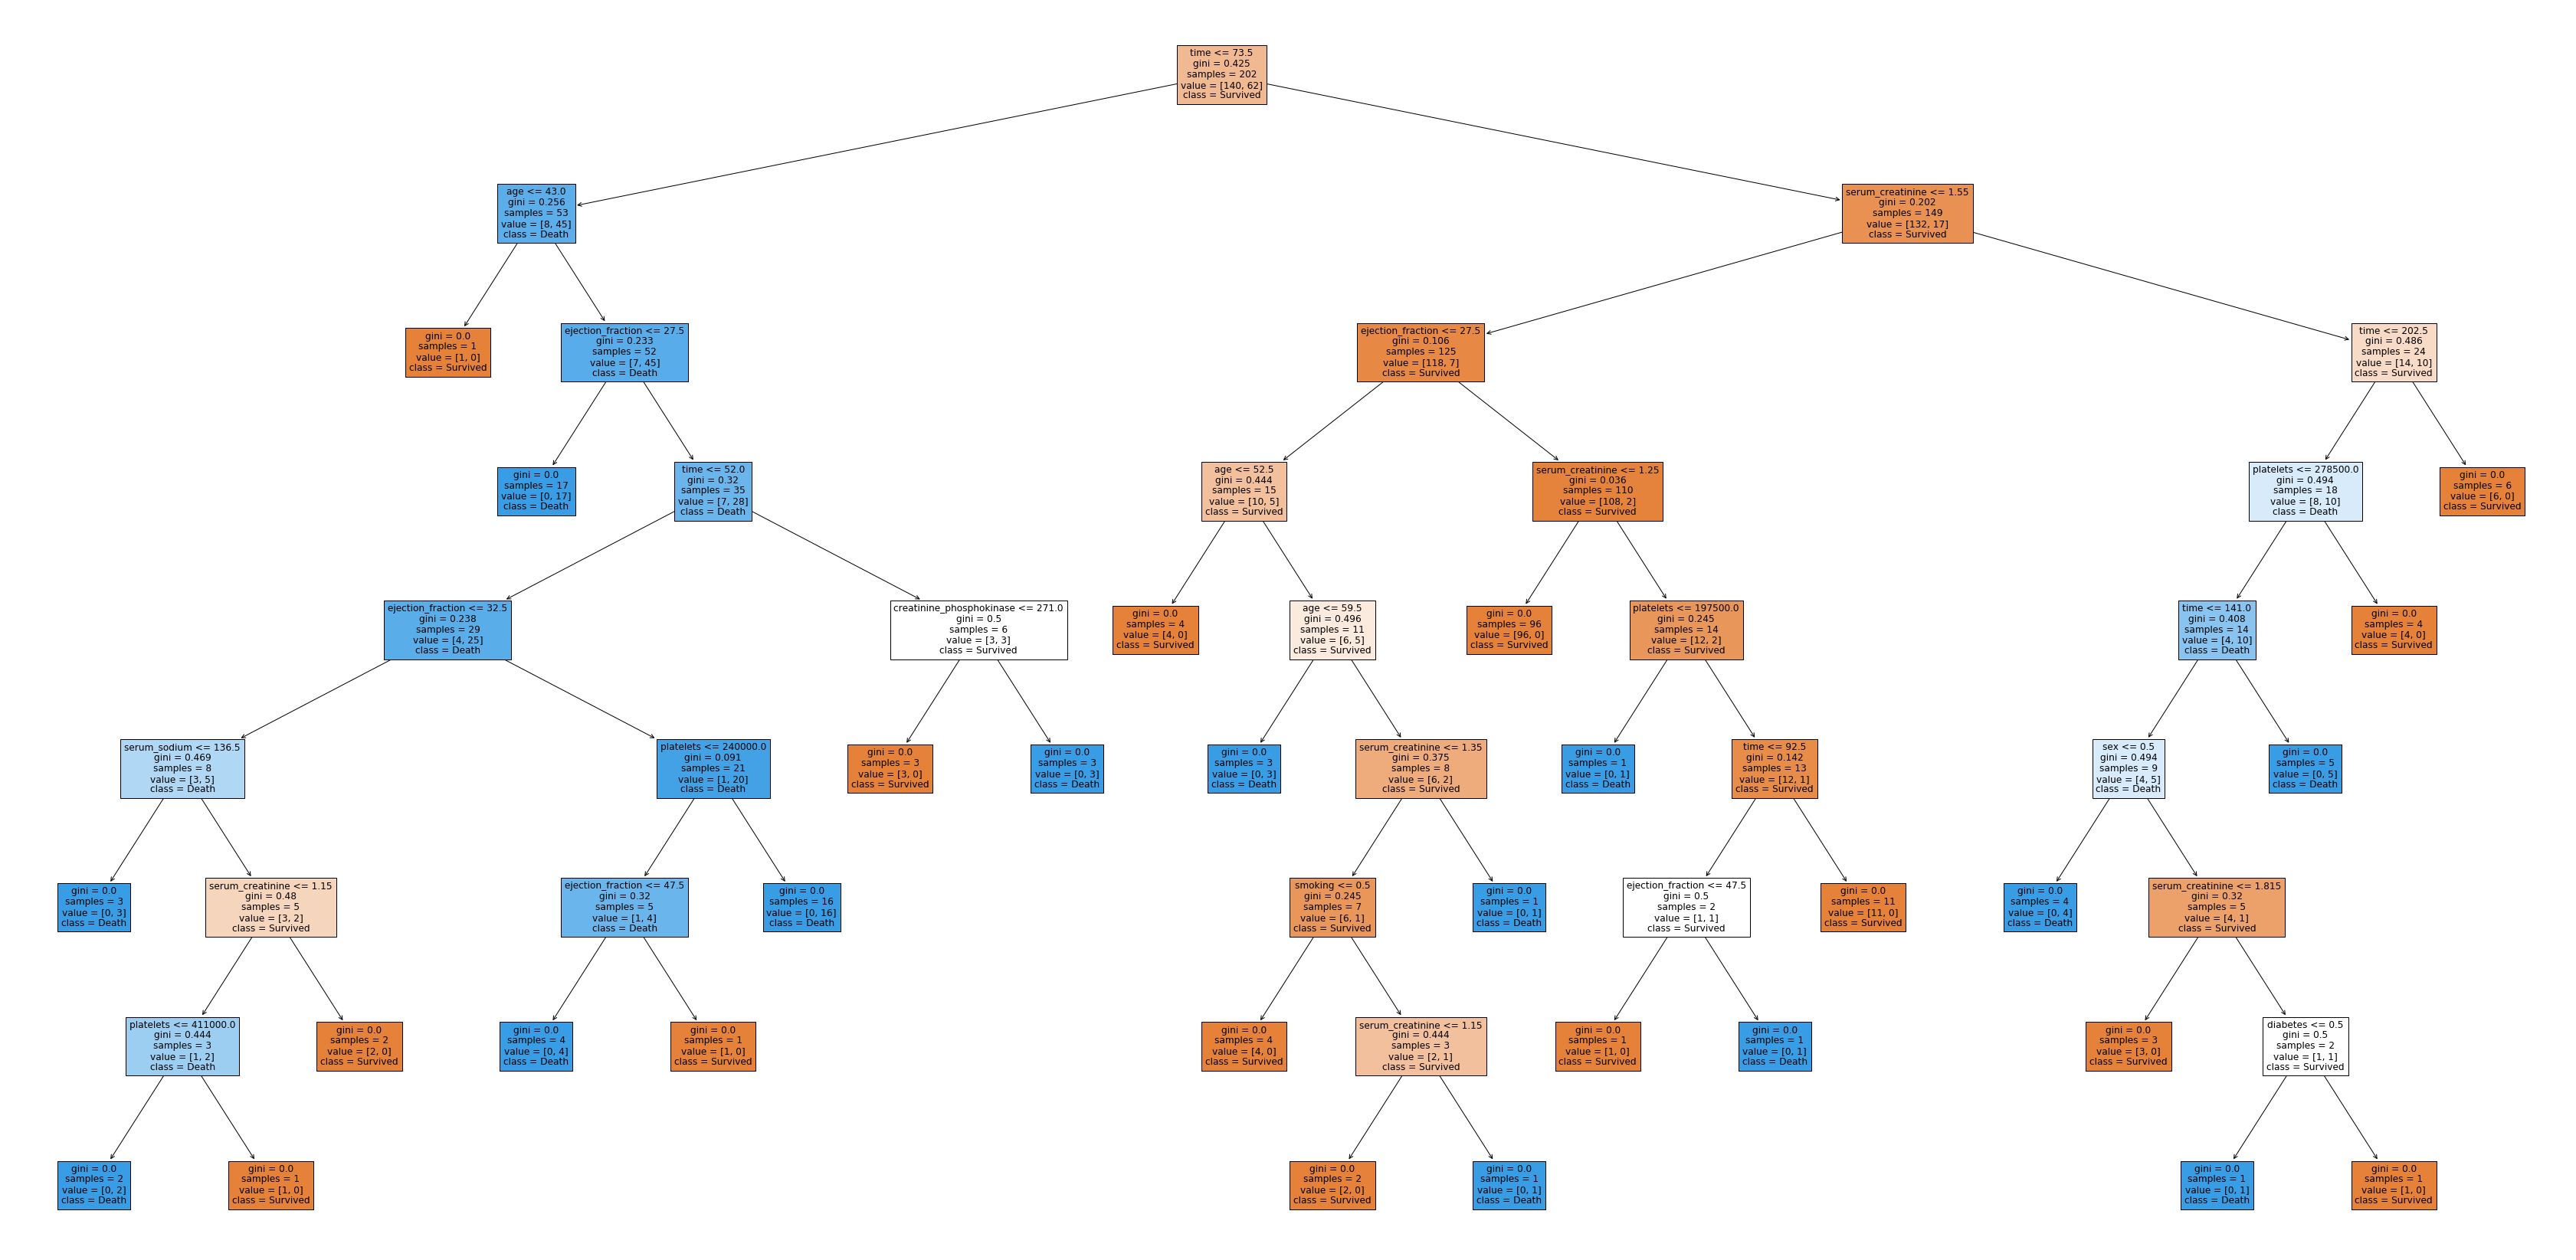

In [69]:
a = timer()
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(x_train, y_train)
b = timer()
print(dt.score(x_train, y_train))

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

Evaluating model performance 

In [70]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("Time taken to generate tree: " + str(delta) + " second")
print("Time taken to predict: " + str(delta1) + " second")

Time taken to generate tree: 0.002432799999951385 second
Time taken to predict: 0.0007567000002381974 second


In [71]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  51
TP  15
FN  19
FP  12
[[51 12]
 [19 15]]


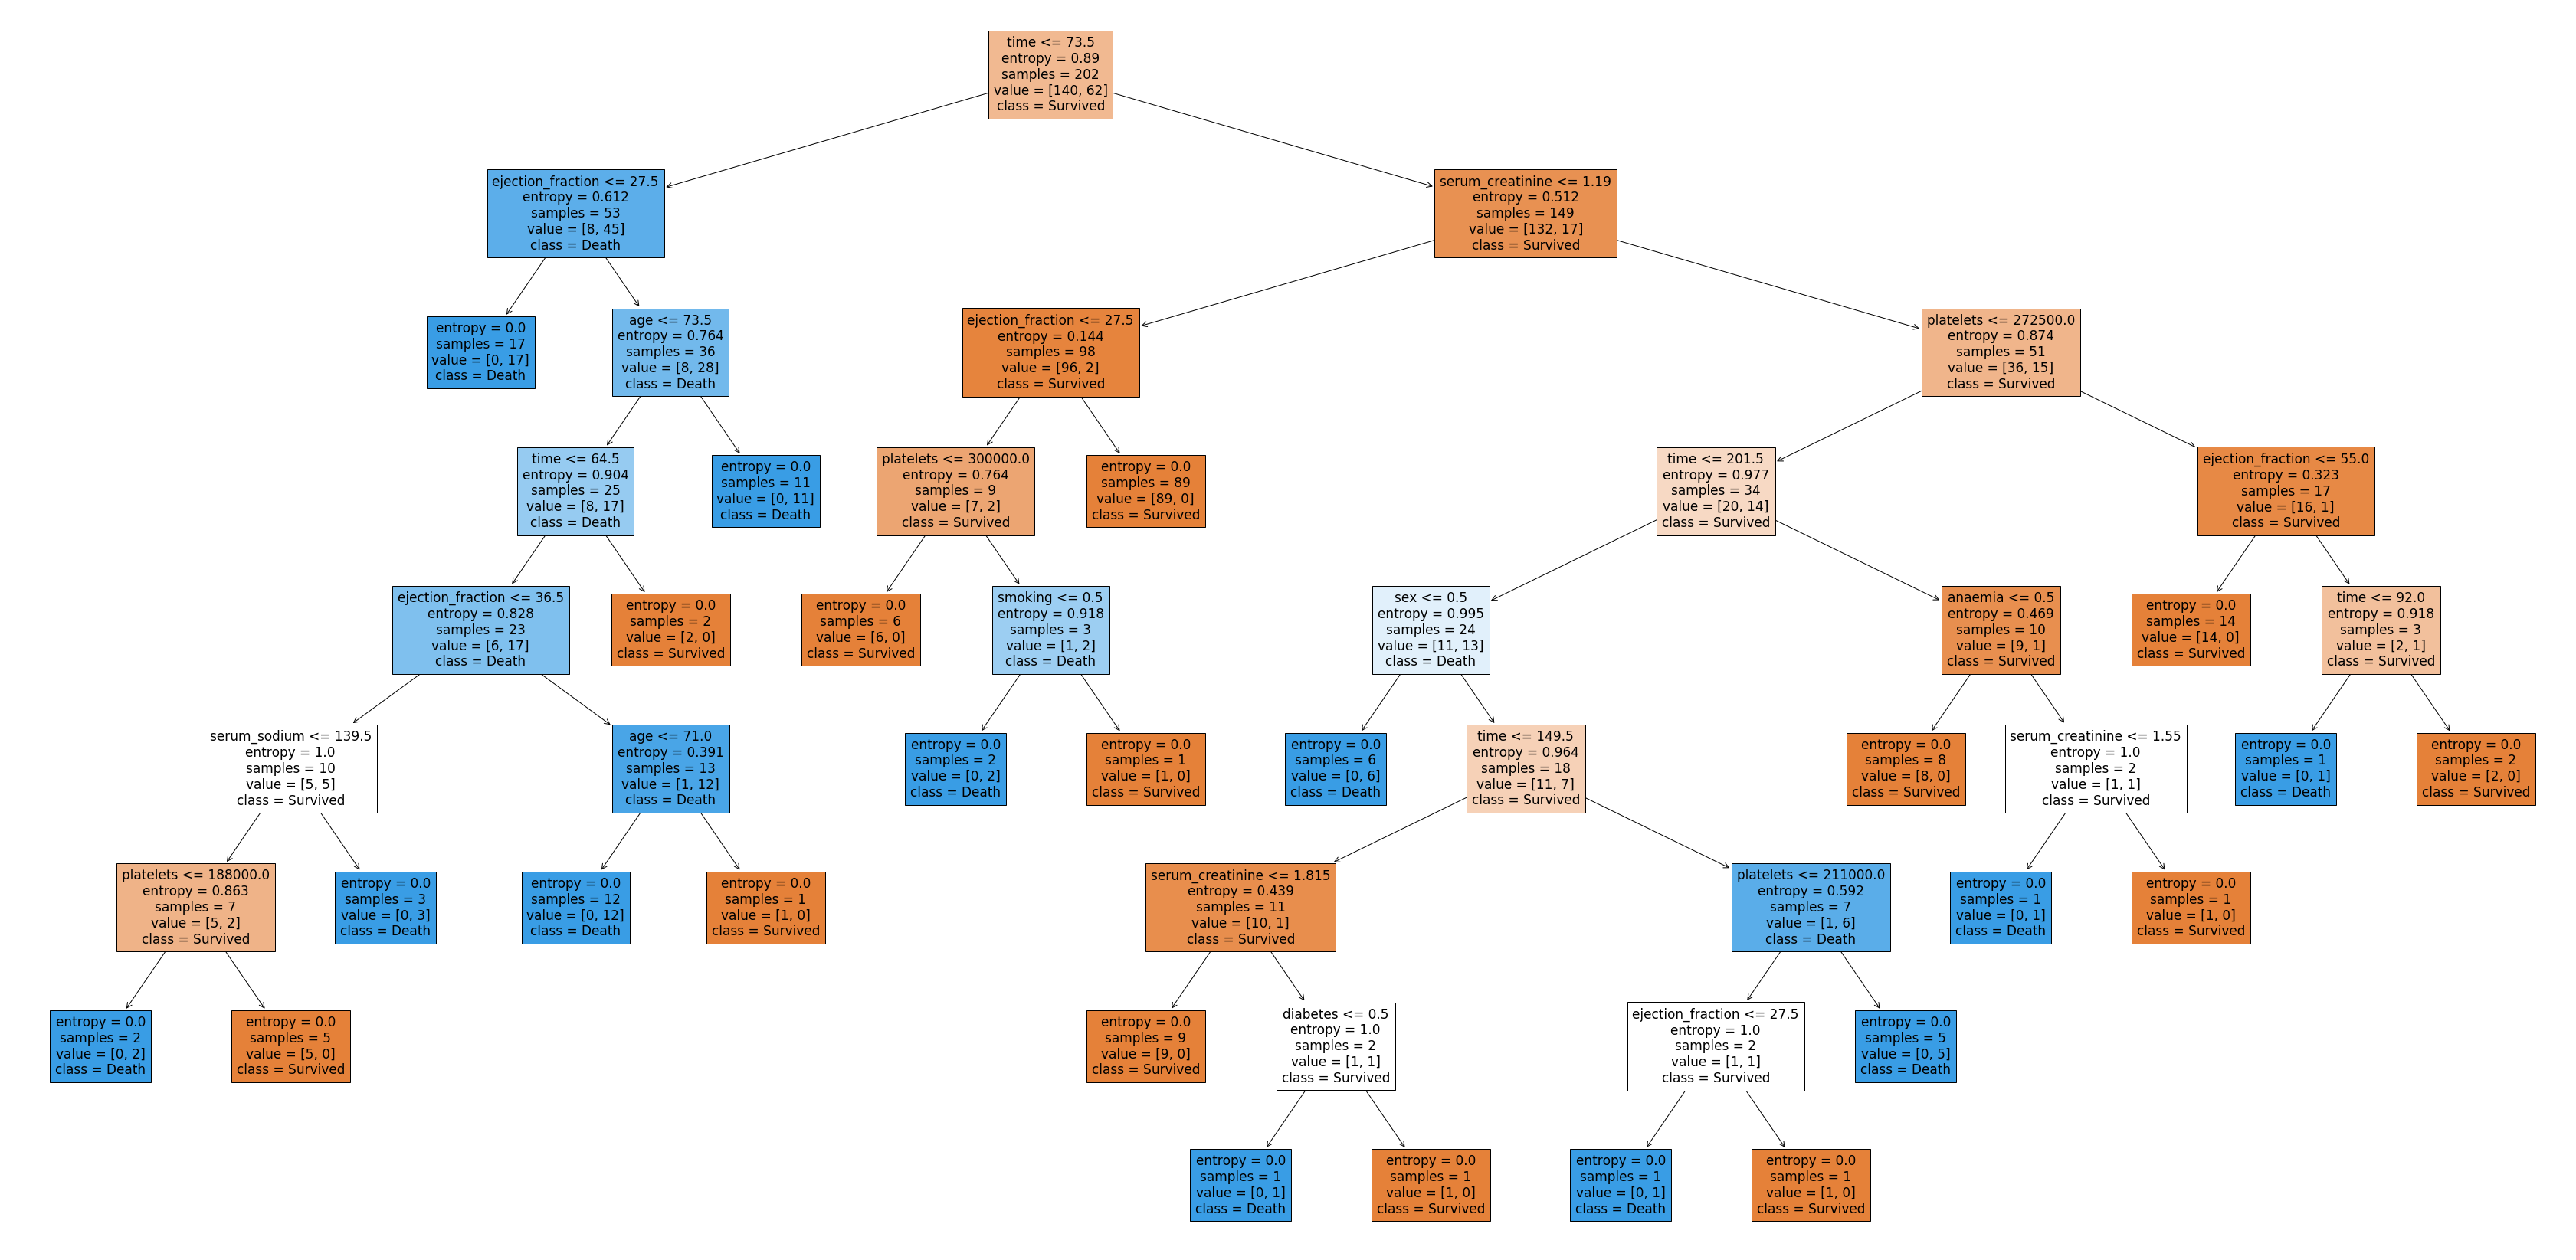

In [72]:
a = timer()
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train, y_train)
b = timer()

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

In [73]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("Time taken to generate tree: " + str(delta) + " second")
print("Time taken to predict: " + str(delta1) + " second")

Time taken to generate tree: 0.007552099999884376 second
Time taken to predict: 0.0010103000004164642 second


In [74]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  54
TP  18
FN  16
FP  9
[[54  9]
 [16 18]]


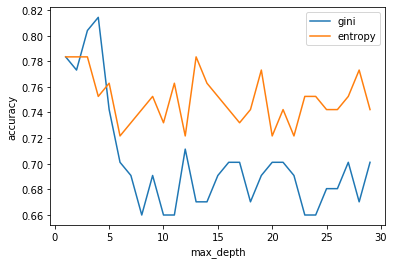

In [75]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

array([[58,  5],
       [13, 21]], dtype=int64)

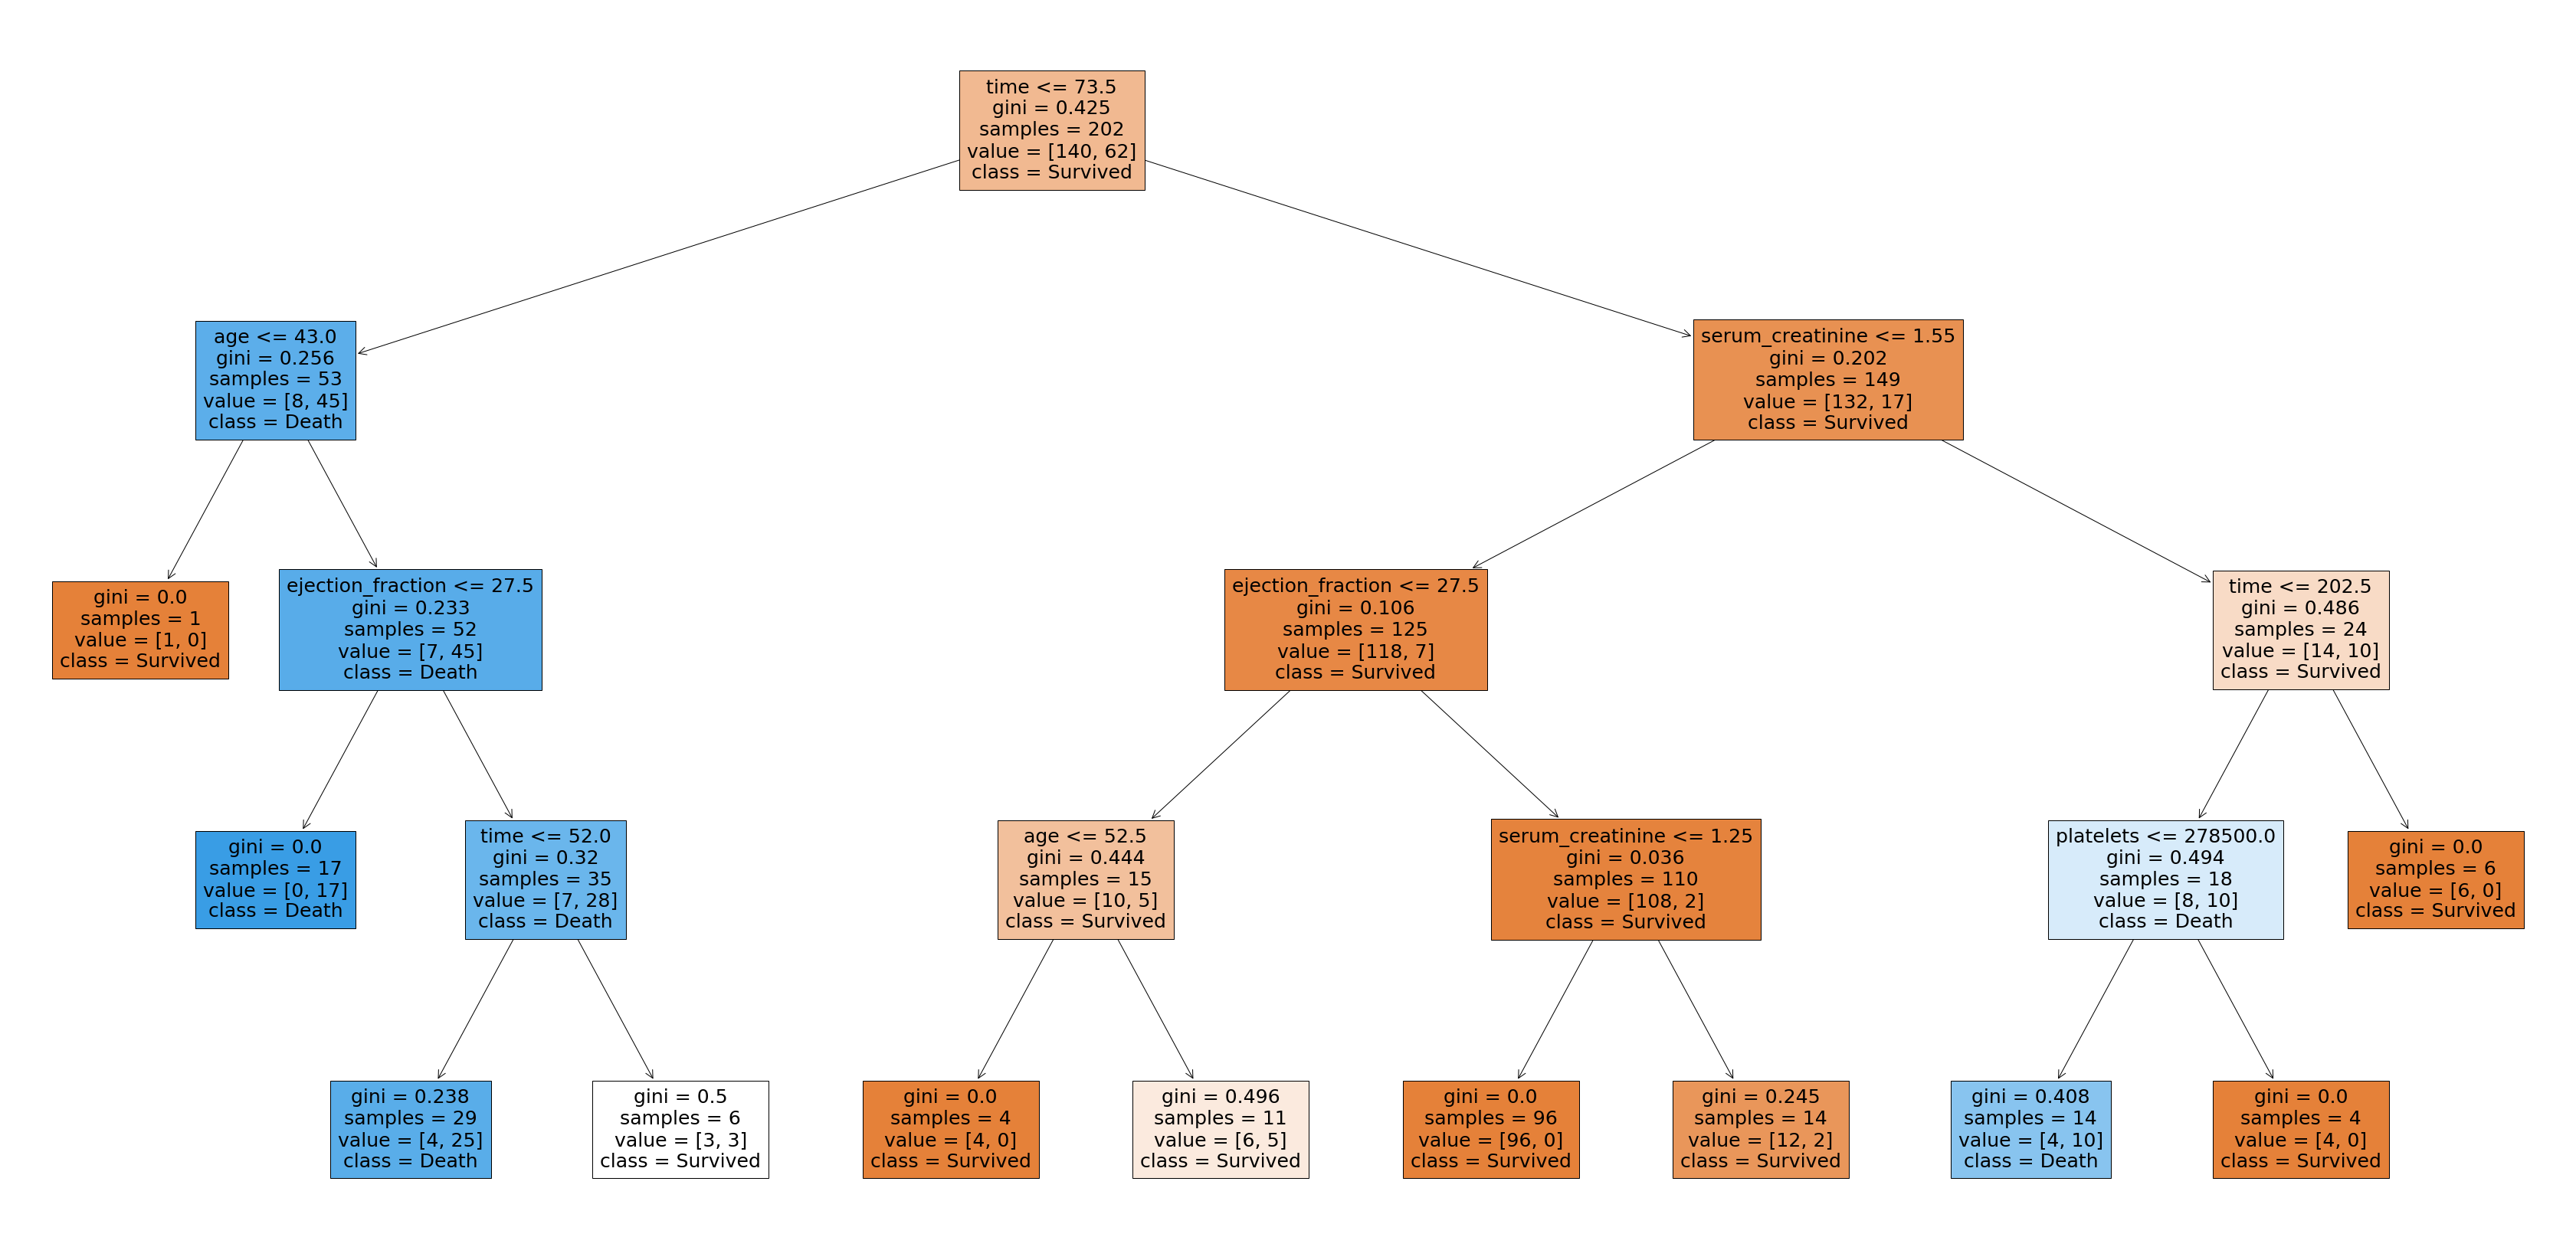

In [76]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[54,  9],
       [ 9, 25]], dtype=int64)

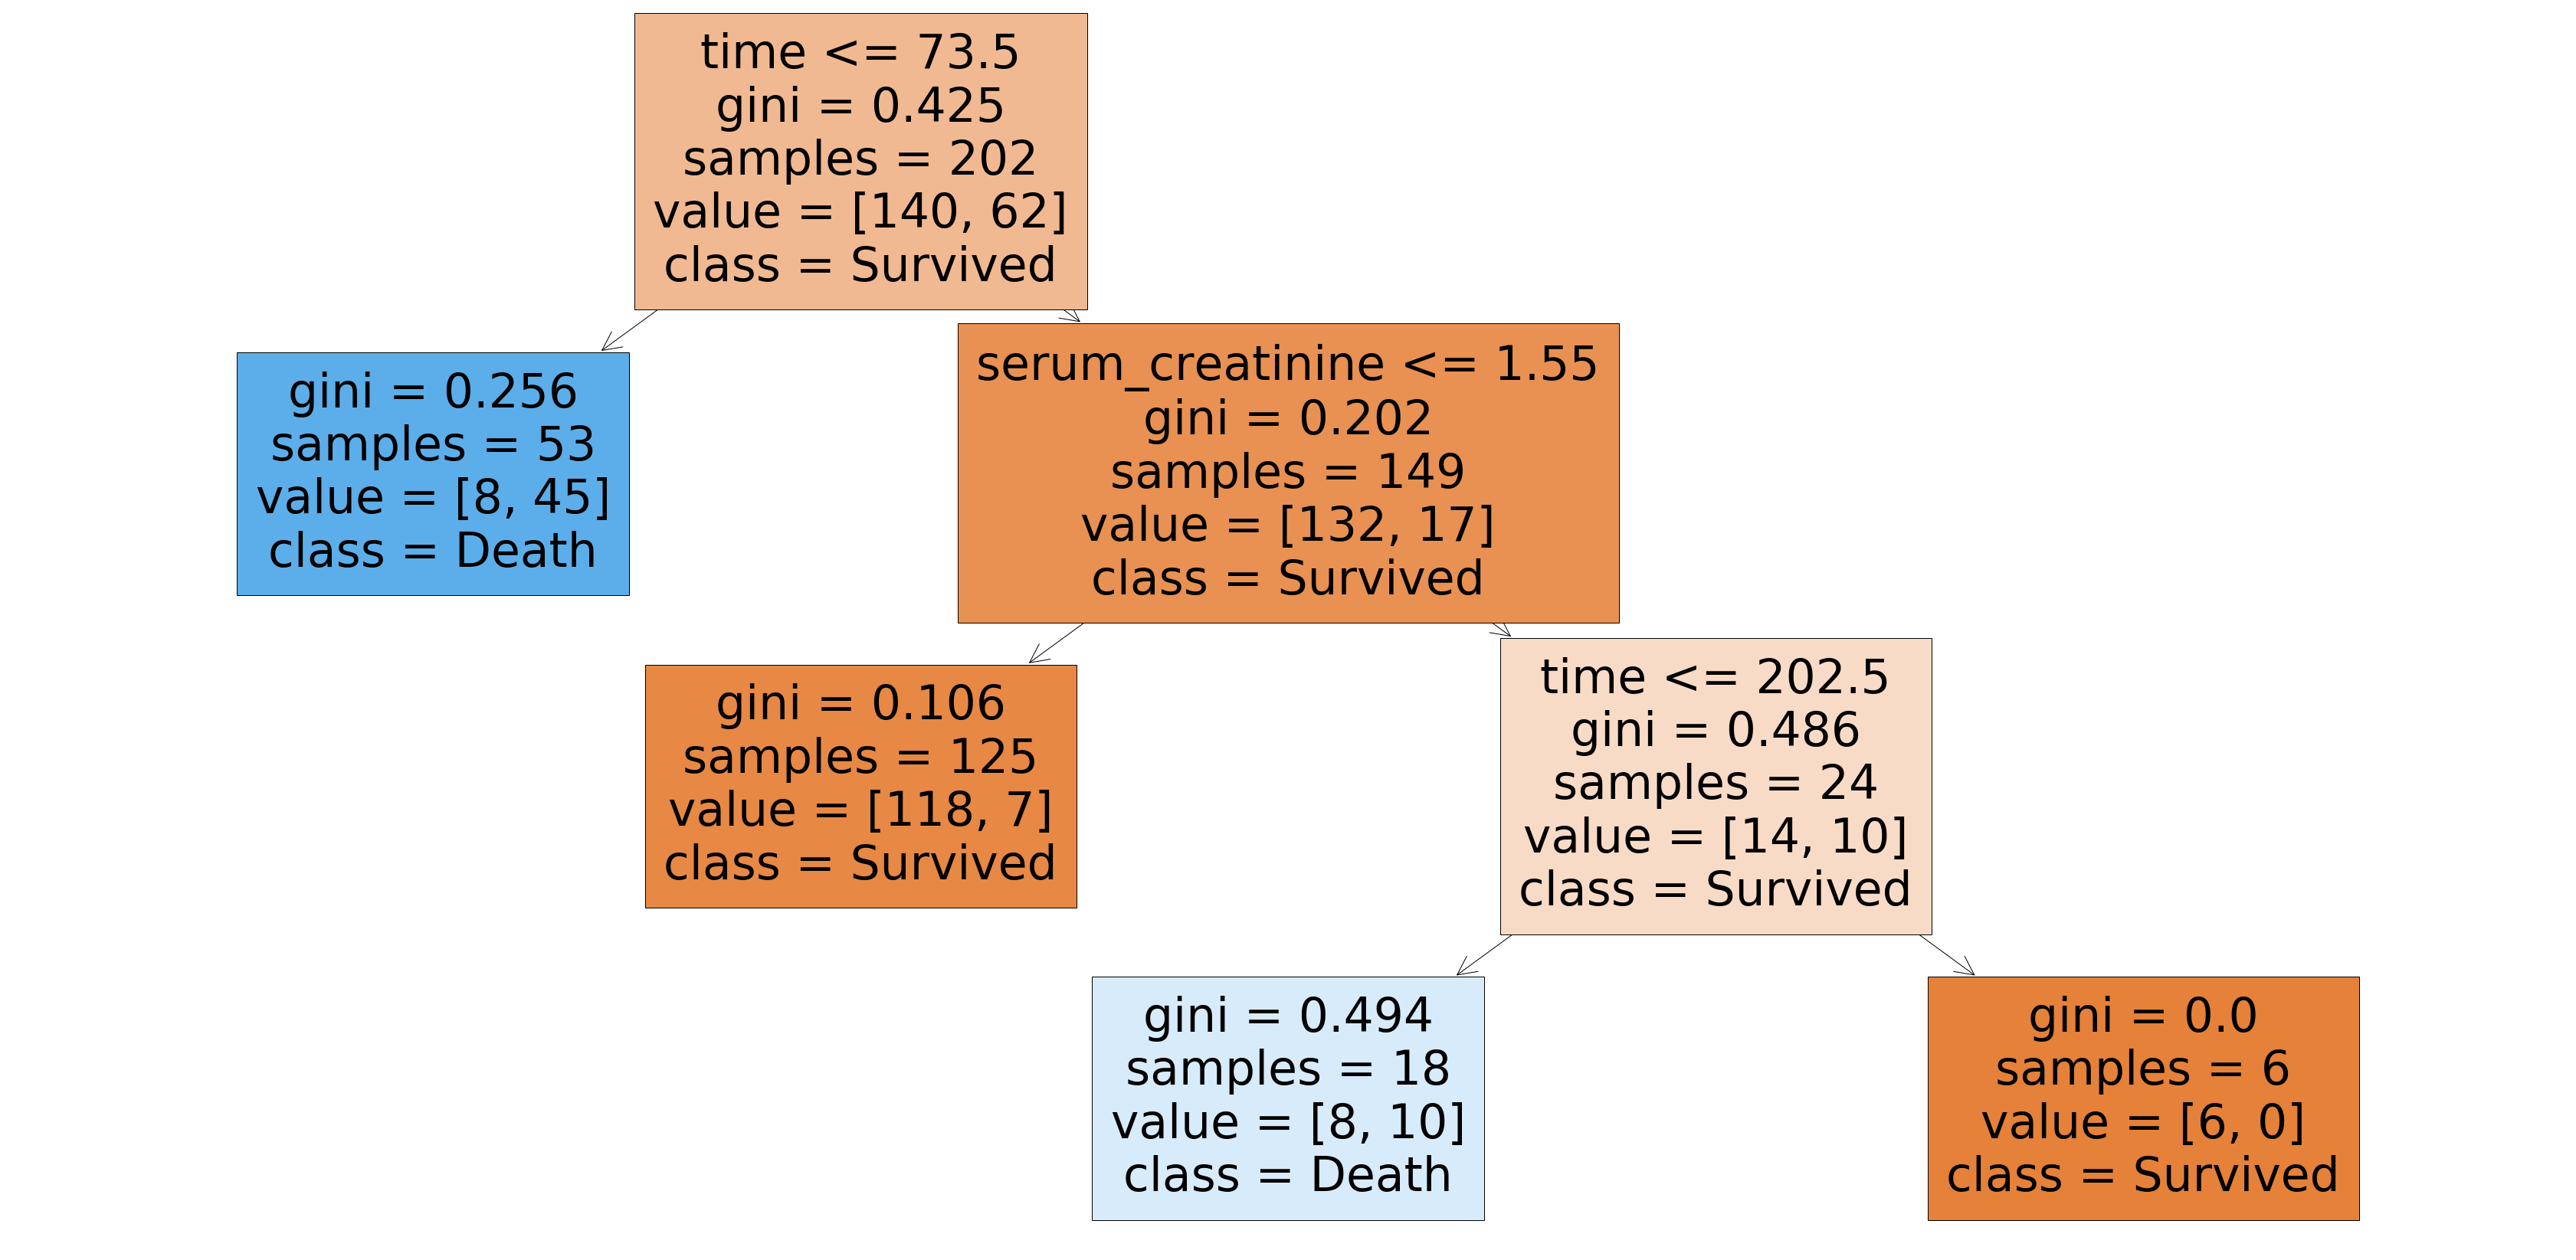

In [77]:
dt = DecisionTreeClassifier(max_leaf_nodes=4)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[58,  5],
       [16, 18]], dtype=int64)

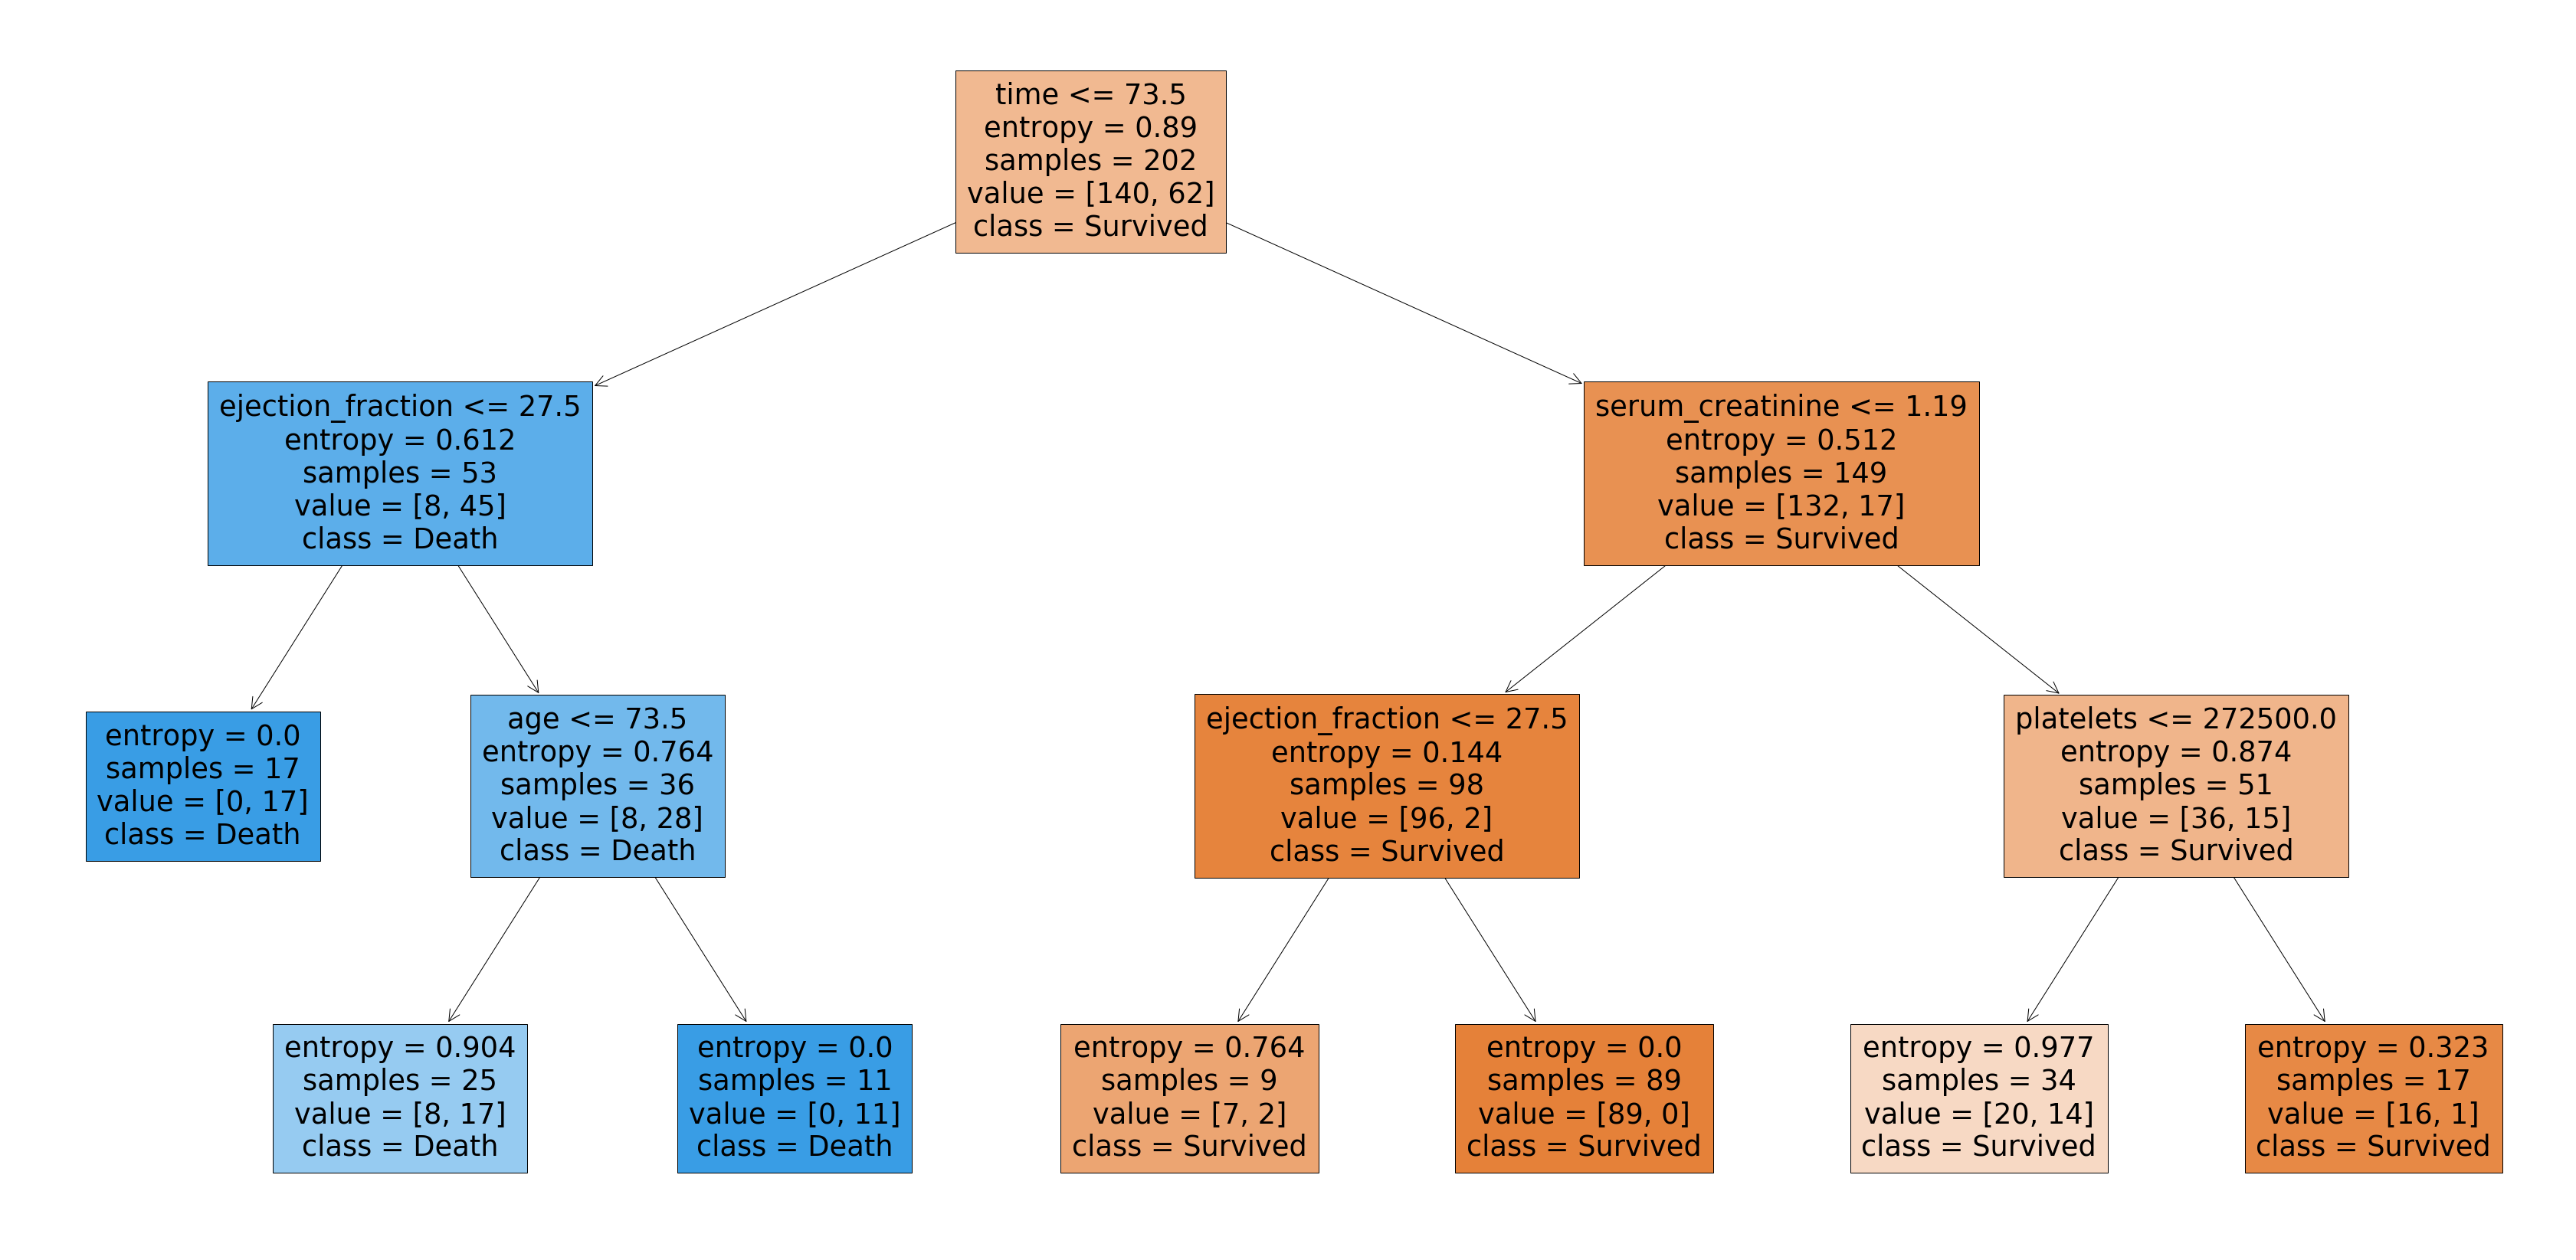

In [78]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[52, 11],
       [13, 21]], dtype=int64)

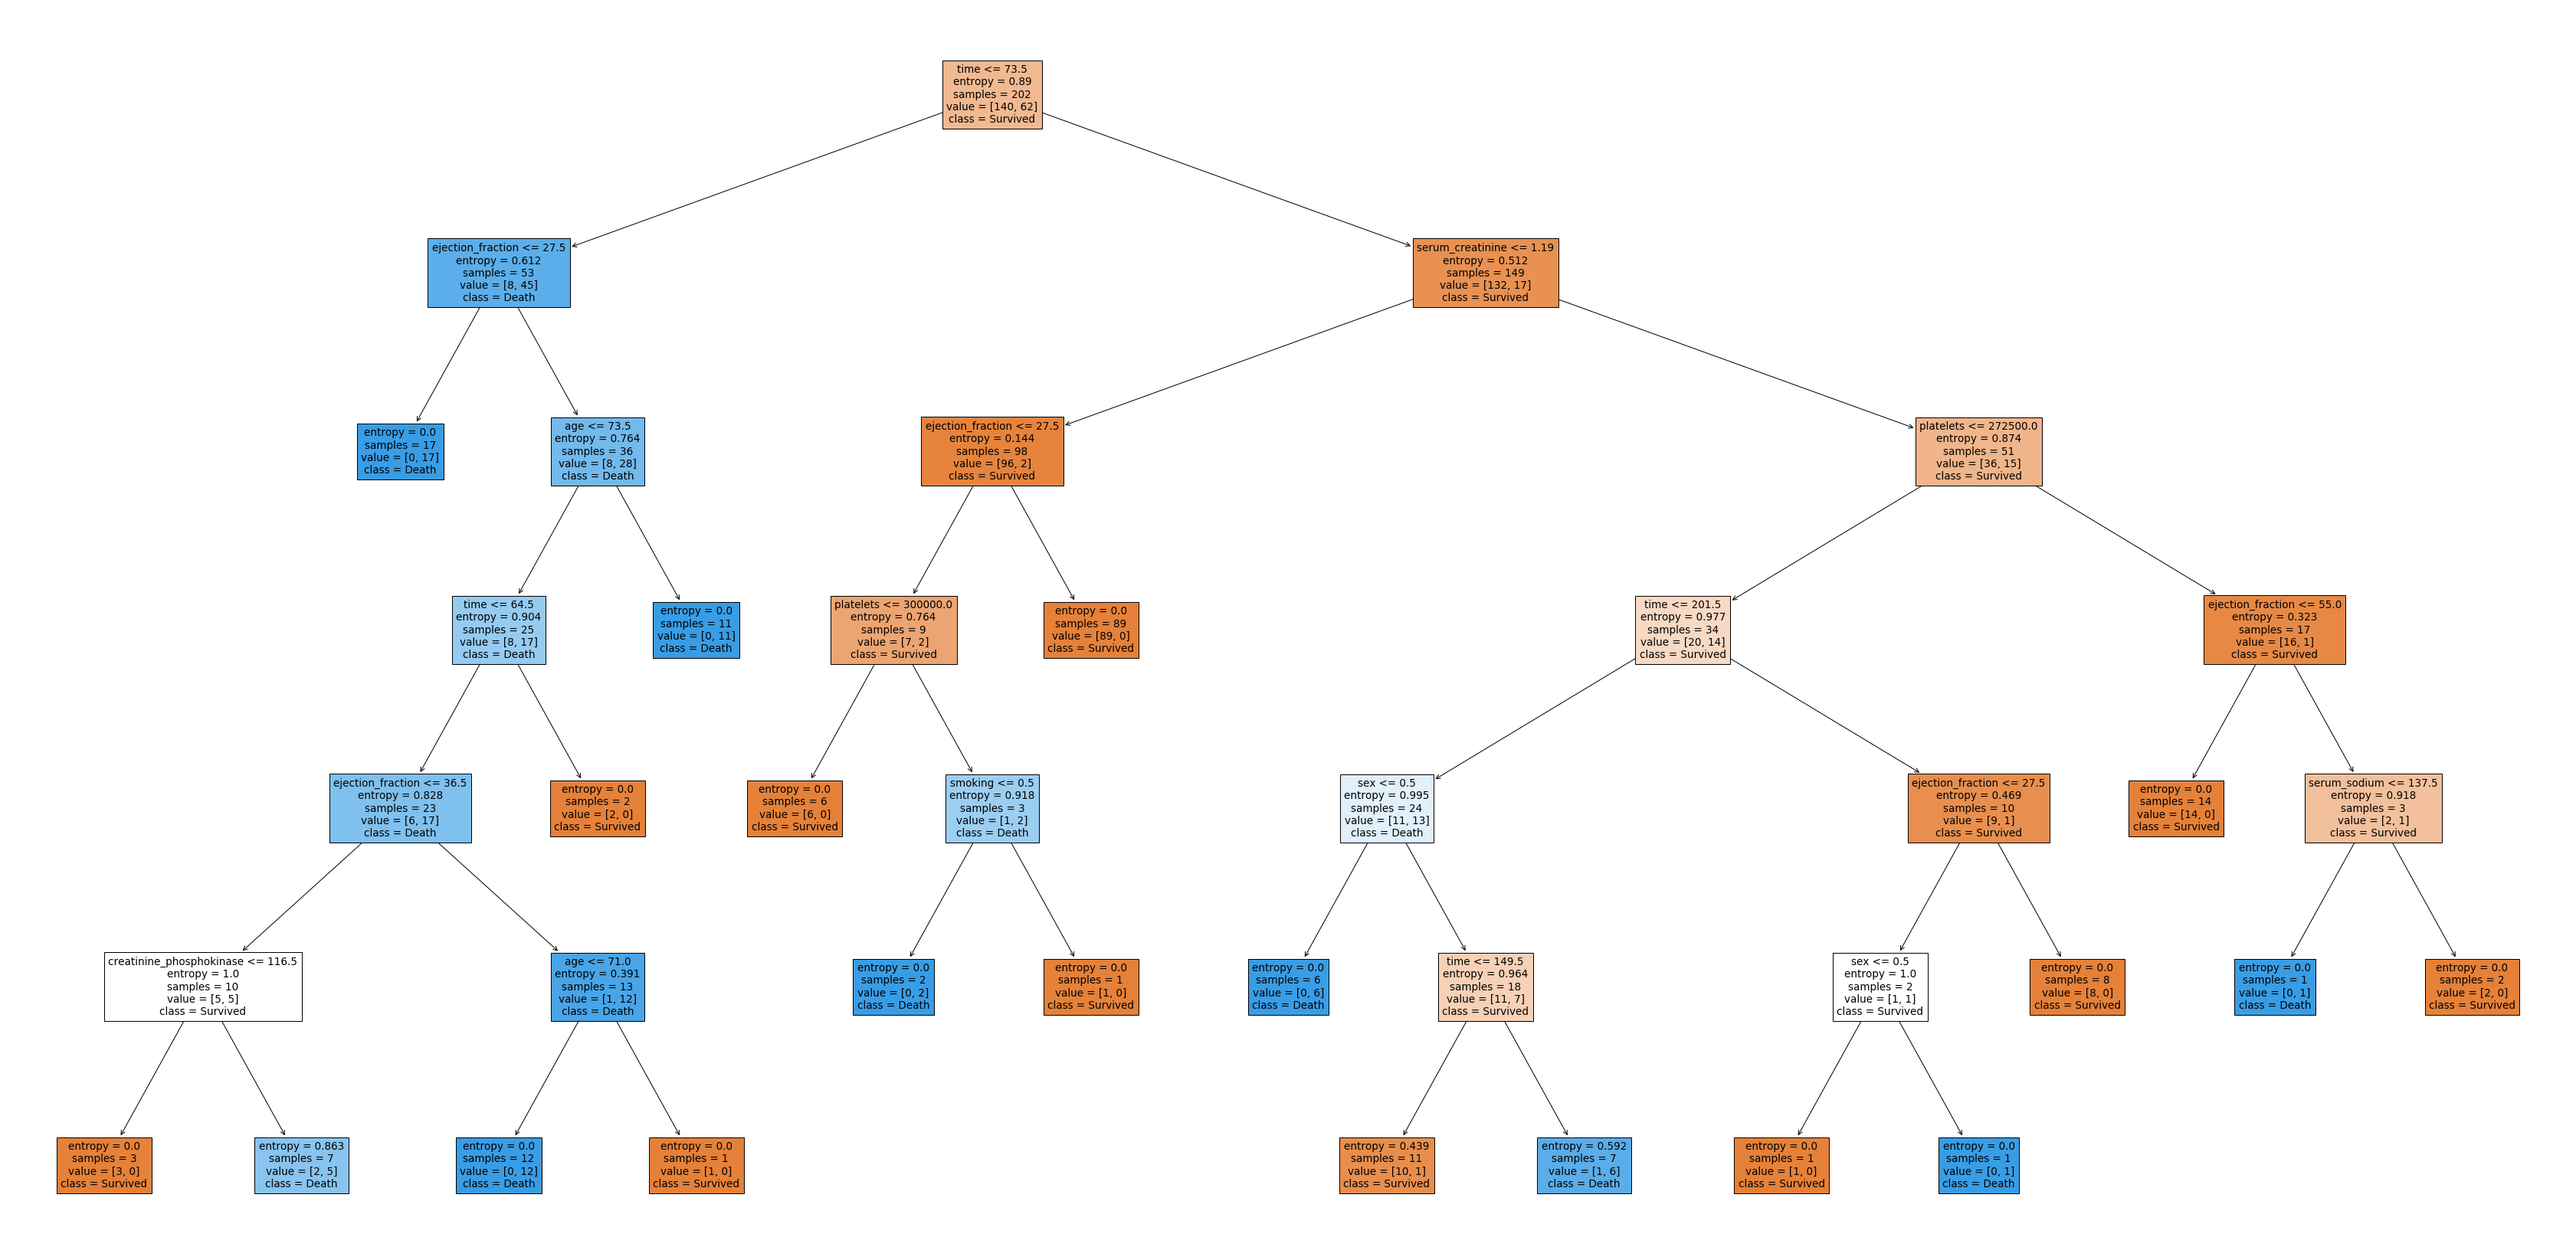

In [79]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[58,  5],
       [16, 18]], dtype=int64)

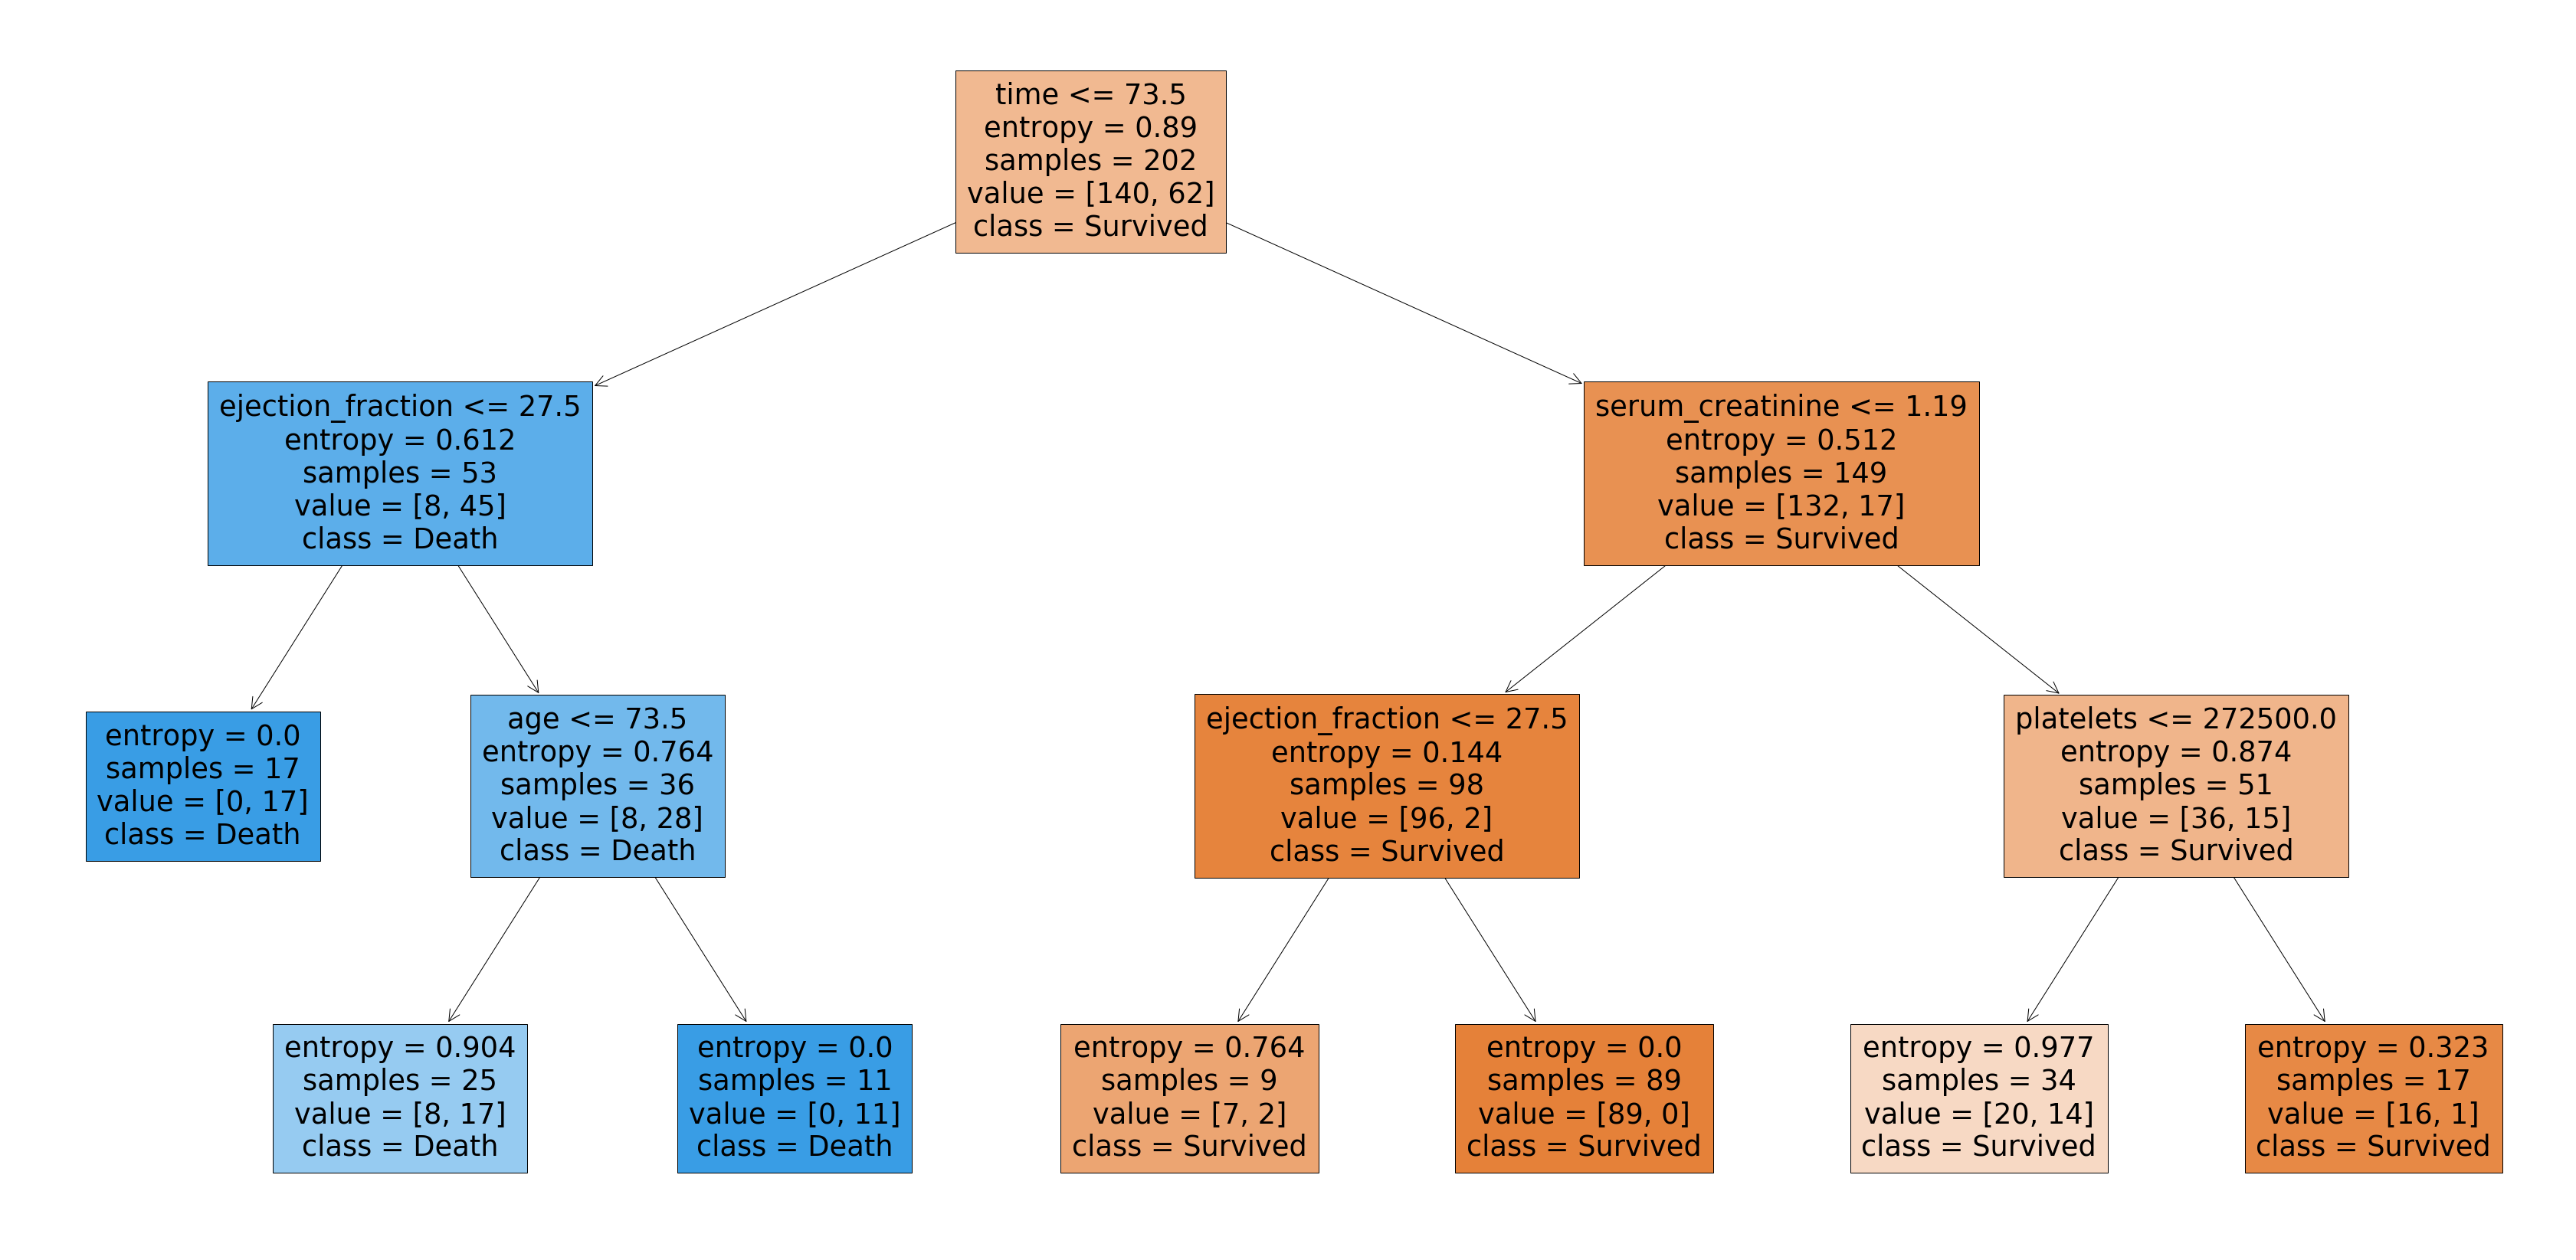

In [80]:
dt = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 7)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf